In [71]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [38]:
def load_eer_thresholds(subject, out_dir='../results'):
    ecg_results_path = os.path.join(out_dir, 'ecg', subject, 'results.json')
    ppg_results_path = os.path.join(out_dir, 'ppg', subject, 'results.json')
    eda_results_path = os.path.join(out_dir, 'eda', subject, 'results.json')

    with open(ecg_results_path, 'r') as f:
        ecg_results = json.load(f)
    with open(ppg_results_path, 'r') as f:
        ppg_results = json.load(f)
    with open(eda_results_path, 'r') as f:
        eda_results = json.load(f)
    eer_thresholds = {
        "ecg": ecg_results['eer_thresholds'],
        "ppg": ppg_results['eer_thresholds'],
        "eda": eda_results['eer_thresholds']
    }
    return eer_thresholds

## Experiment 1

In [44]:
subject_ids = ['c1s01', 'c1s03', 'c1s05', 'c2s01', 'c2s02', 'c2s03', 'c2s04', 'c2s05']
versions = ['v1', 'v2', 'v3', 'v4', 'v5']

In [48]:
exp1_result = defaultdict(dict)

In [66]:
for subject_id in subject_ids:
    thresholds = load_eer_thresholds(subject_id)
    results_prob = '../results/MoE/{}'.format(subject_id)
    results_mv = '../results/MoE_mv/{}'.format(subject_id)

    _exp1_result = defaultdict(lambda: defaultdict(list))
    for i, version in enumerate(versions):    
        val_df_prob = pd.read_csv(os.path.join(results_prob, version, 'MoE_val.csv'))
        val_df_mv = pd.read_csv(os.path.join(results_mv, version, 'MoE_val.csv'))
        
        ecg_threshold = thresholds['ecg'][i]
        ppg_threshold = thresholds['ppg'][i]
        eda_threshold = thresholds['eda'][i]

        binarized_prob = val_df_prob.copy()
        binarized_prob['ecg'] = (binarized_prob['ecg'] > ecg_threshold).astype(int)
        binarized_prob['ppg'] = (binarized_prob['ppg'] > ppg_threshold).astype(int)
        binarized_prob['eda'] = (binarized_prob['eda'] > eda_threshold).astype(int)

        _exp1_result['ecg']['prob'].append((binarized_prob['ecg'] == binarized_prob['label']).mean().item())
        _exp1_result['ecg']['mv'].append((val_df_mv['ecg'] == val_df_mv['label']).mean().item())
        
        _exp1_result['ppg']['prob'].append((binarized_prob['ppg'] == binarized_prob['label']).mean().item())
        _exp1_result['ppg']['mv'].append((val_df_mv['ppg'] == val_df_mv['label']).mean().item())

        _exp1_result['eda']['prob'].append((binarized_prob['eda'] == binarized_prob['label']).mean().item())
        _exp1_result['eda']['mv'].append((val_df_mv['eda'] == val_df_mv['label']).mean().item())

        _exp1_result['MoE']['prob'].append((binarized_prob['pred'] == binarized_prob['label']).mean().item())
        _exp1_result['MoE']['mv'].append((val_df_mv['pred'] == val_df_mv['label']).mean().item())


    _exp1_result['ecg']['prob'] = sum(_exp1_result['ecg']['prob']) / len(_exp1_result['ecg']['prob'])
    _exp1_result['ecg']['mv'] = sum(_exp1_result['ecg']['mv']) / len(_exp1_result['ecg']['mv'])

    _exp1_result['ppg']['prob'] = sum(_exp1_result['ppg']['prob']) / len(_exp1_result['ppg']['prob'])
    _exp1_result['ppg']['mv'] = sum(_exp1_result['ppg']['mv']) / len(_exp1_result['ppg']['mv'])

    _exp1_result['eda']['prob'] = sum(_exp1_result['eda']['prob']) / len(_exp1_result['eda']['prob'])
    _exp1_result['eda']['mv'] = sum(_exp1_result['eda']['mv']) / len(_exp1_result['eda']['mv'])

    _exp1_result['MoE']['prob'] = sum(_exp1_result['MoE']['prob']) / len(_exp1_result['MoE']['prob'])
    _exp1_result['MoE']['mv'] = sum(_exp1_result['MoE']['mv']) / len(_exp1_result['MoE']['mv'])

    exp1_result[subject_id]['prob/ECG'] = _exp1_result['ecg']['prob']
    exp1_result[subject_id]['mv/ECG'] = _exp1_result['ecg']['mv']
    exp1_result[subject_id]['prob/PPG'] = _exp1_result['ppg']['prob']
    exp1_result[subject_id]['mv/PPG'] = _exp1_result['ppg']['mv']
    exp1_result[subject_id]['prob/EDA'] = _exp1_result['eda']['prob']
    exp1_result[subject_id]['mv/EDA'] = _exp1_result['eda']['mv']
    exp1_result[subject_id]['prob/ECG+PPG+EDA'] = _exp1_result['MoE']['prob']
    exp1_result[subject_id]['mv/ECG+PPG+EDA'] = _exp1_result['MoE']['mv']




In [67]:
print(exp1_result)

defaultdict(<class 'dict'>, {'c1s01': {'prob/ECG': 0.7772727272727272, 'mv/ECG': 0.7868686868686869, 'prob/PPG': 0.5545454545454545, 'mv/PPG': 0.5520202020202021, 'prob/EDA': 0.5858585858585859, 'mv/EDA': 0.5858585858585859, 'prob/ECG+PPG+EDA': 0.8282828282828282, 'mv/ECG+PPG+EDA': 0.7868686868686869}, 'c1s03': {'prob/ECG': 0.8570666666666666, 'mv/ECG': 0.8544, 'prob/PPG': 0.7146666666666667, 'mv/PPG': 0.7306666666666667, 'prob/EDA': 0.5413333333333334, 'mv/EDA': 0.5408000000000001, 'prob/ECG+PPG+EDA': 0.8981333333333333, 'mv/ECG+PPG+EDA': 0.8629333333333333}, 'c1s05': {'prob/ECG': 0.9003891050583658, 'mv/ECG': 0.9241245136186771, 'prob/PPG': 0.7470817120622568, 'mv/PPG': 0.7455252918287938, 'prob/EDA': 0.5509727626459144, 'mv/EDA': 0.5513618677042802, 'prob/ECG+PPG+EDA': 0.9505836575875486, 'mv/ECG+PPG+EDA': 0.9241245136186771}, 'c2s01': {'prob/ECG': 0.9046793760831889, 'mv/ECG': 0.9140381282495668, 'prob/PPG': 0.6069324090121316, 'mv/PPG': 0.6048526863084922, 'prob/EDA': 0.5046793760

In [75]:
results = {
    'Modality': [],
    'Method': [],
    'accuracy': [],
}

for subject_id in subject_ids:
    for key in exp1_result[subject_id]:
        modality = key.split('/')[1]
        method = key.split('/')[0]
        if modality == "ECG+PPG+EDA":
            continue    

        results['Modality'].append(modality)
        results['Method'].append(method)
        results['accuracy'].append(exp1_result[subject_id][key])

results_df = pd.DataFrame(results)

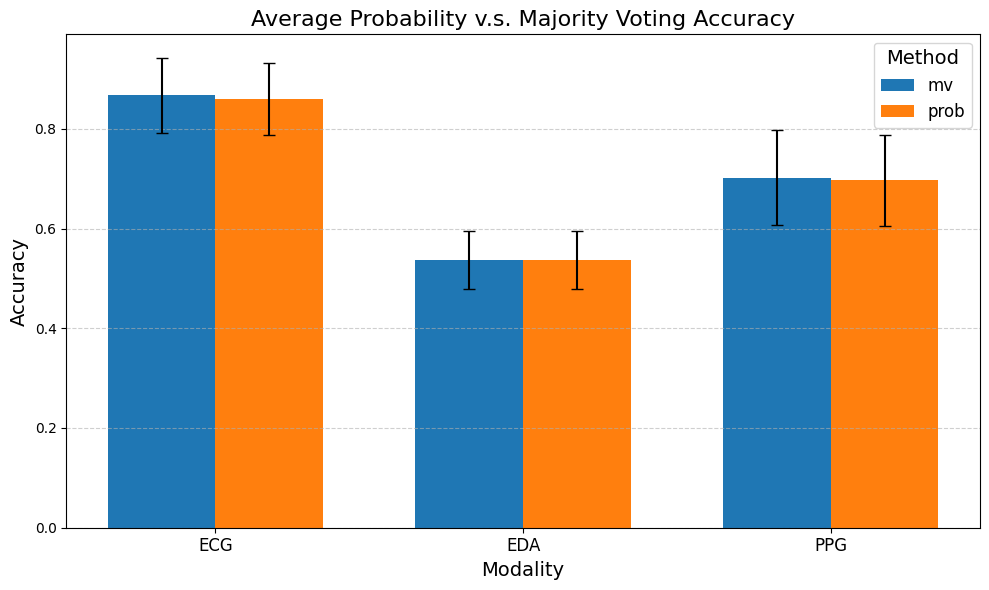

In [79]:
# Convert the results dictionary into a pandas DataFrame
results_df = pd.DataFrame(results)

# Calculate mean accuracy and standard deviation for each Modality and Method
summary = results_df.groupby(['Modality', 'Method'])['accuracy'].agg(['mean', 'std']).reset_index()

# Extract unique modalities and methods for plotting
modalities = summary['Modality'].unique()
methods = summary['Method'].unique()

# Create the bar plot
x = np.arange(len(modalities))  # Position for each modality
bar_width = 0.35  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each method as a grouped bar
for i, method in enumerate(methods):
    method_data = summary[summary['Method'] == method]
    ax.bar(
        x + i * bar_width,
        method_data['mean'],
        bar_width,
        yerr=method_data['std'],  # Add error bars
        capsize=4,
        label=method
    )
    
# Formatting the plot
ax.set_xlabel('Modality', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Average Probability v.s. Majority Voting Accuracy', fontsize=16)
ax.set_xticks(x + bar_width / 2)  # Center x-ticks between grouped bars
ax.set_xticklabels(modalities, fontsize=12)
ax.legend(title='Method', fontsize=12, title_fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [69]:
# 2-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(results)
print(df.head())
model = ols('accuracy ~ C(Modality) + C(Method) + C(Modality):C(Method)', data=df).fit()
anova_table = anova_lm(model, typ=2)

print(anova_table)

  Modality Method  accuracy
0      ECG   prob  0.777273
1      ECG     mv  0.786869
2      PPG   prob  0.554545
3      PPG     mv  0.552020
4      EDA   prob  0.585859
                         sum_sq    df          F        PR(>F)
C(Modality)            0.852183   2.0  73.200096  2.048929e-14
C(Method)              0.000221   1.0   0.037935  8.465137e-01
C(Modality):C(Method)  0.000100   2.0   0.008598  9.914405e-01
Residual               0.244479  42.0        NaN           NaN


## Experiment 2

In [ ]:
results = {}
for subject_id in subject_ids:
    results[subject_id] = {
        